In [2]:
# load modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import shap
from sklearn.ensemble import StackingClassifier
import joblib

In [3]:
# loading dataset
data=pd.read_csv(r"C:\Users\kommu\OneDrive\Documents\GitHub\Transparency_in_Finanancial_fraud_detectio_using_explainable_AI\Base.csv\Base.csv")

In [6]:
data.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,AD,1204,...,0,200.0,0,INTERNET,6.987316,linux,1,1,0,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,AB,1998,...,0,200.0,0,INTERNET,28.199923,x11,1,1,0,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,...,1,200.0,0,INTERNET,11.234264,other,1,1,0,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,AB,1781,...,0,200.0,0,INTERNET,5.329387,other,1,1,0,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,AD,3113,...,0,1500.0,0,INTERNET,4.103970,other,1,1,0,0


In [7]:
data.shape

(1000000, 32)

In [8]:
# Get the number of unique values in each column of the DataFrame
data.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

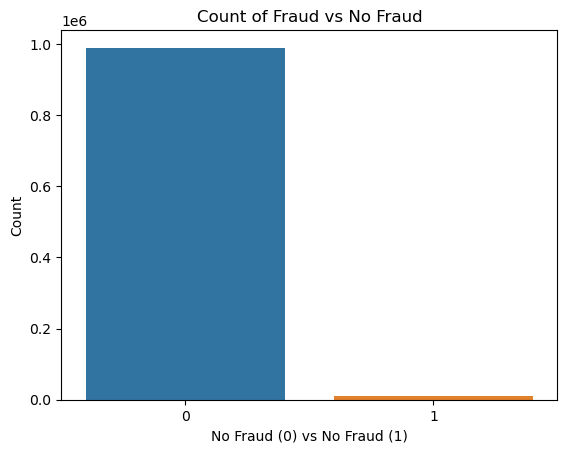

In [10]:

# Create the countplot
sn.countplot(x=data['fraud_bool'])
plt.title('Count of Fraud vs No Fraud')
plt.xlabel('No Fraud (0) vs No Fraud (1)')
plt.ylabel('Count')
plt.show()

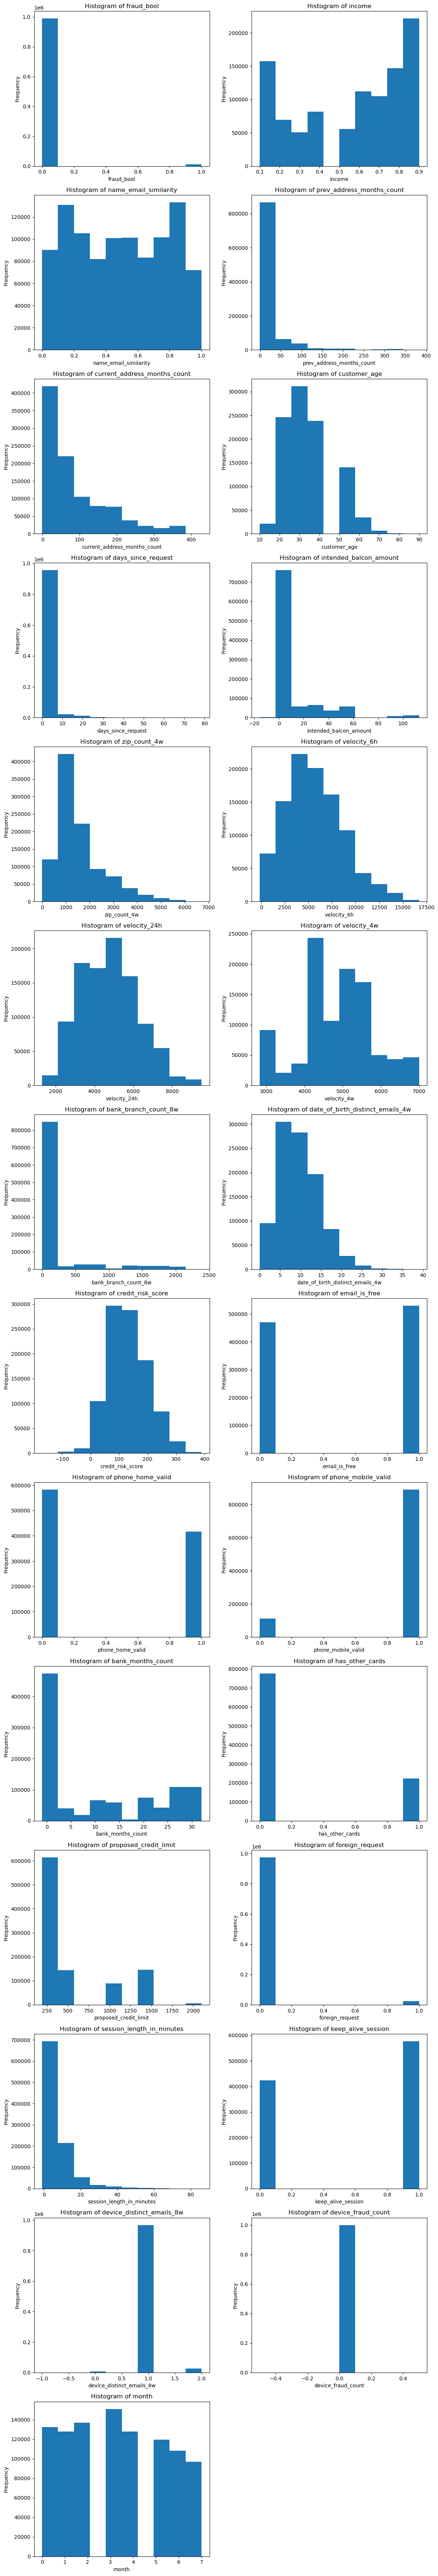

In [11]:
numeric_columns = [col for col in data.columns if data[col].dtype == 'float64' or data[col].dtype == 'int64']


n_cols = 2
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols


fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))


axes = axes.flatten()

# Loop through the selected numeric columns and plot them
for i, col in enumerate(numeric_columns):
    axes[i].hist(data[col])  
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {col}')

# Hide any extra subplots if there are more subplots than columns
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout
plt.tight_layout()
plt.show()


In [ ]:

categorical_columns = [col for col in data.columns if data[col].dtype == 'flot64' or 'int64']

n_cols=2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))


axes = axes.flatten()


for i, col in enumerate(categorical_columns):
    sn.countplot(x=data[col], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')


plt.tight_layout()
plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000212CD256660> (for post_execute), with arguments args (),kwargs {}:
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\kommu\anaconda3\Lib\site-packages\IPython\core\events.py", line 82, in trigger
    func(*args, **kwargs)
  File "c:\Users\kommu\anaconda3\Lib\site-packages\matplotlib\pyplot.py", line 197, in _draw_all_if_interactive
    draw_all()
  File "c:\Users\kommu\anaconda3\Lib\site-packages\matplotlib\_pylab_helpers.py", line 132, in draw_all
    manager.canvas.draw_idle()
  File "c:\Users\kommu\anaconda3\Lib\site-packages\matplotlib\backend_bases.py", line 1893, in draw_idle
    self.draw(*args, **kwargs)
  File "c:\Users\kommu\anaconda3\Lib\site-packages\matplotlib\backends\backend_agg.py", line 388, in draw
    self.figure.draw(self.renderer)
  File "c:\Users\kommu\anaconda3\Lib\site-packages\matplotlib\artist.py", line 95, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kommu\anaconda3\Lib\site-packages\matplotlib\artist.py", line 72, in draw_wrapper

c:\Users\kommu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


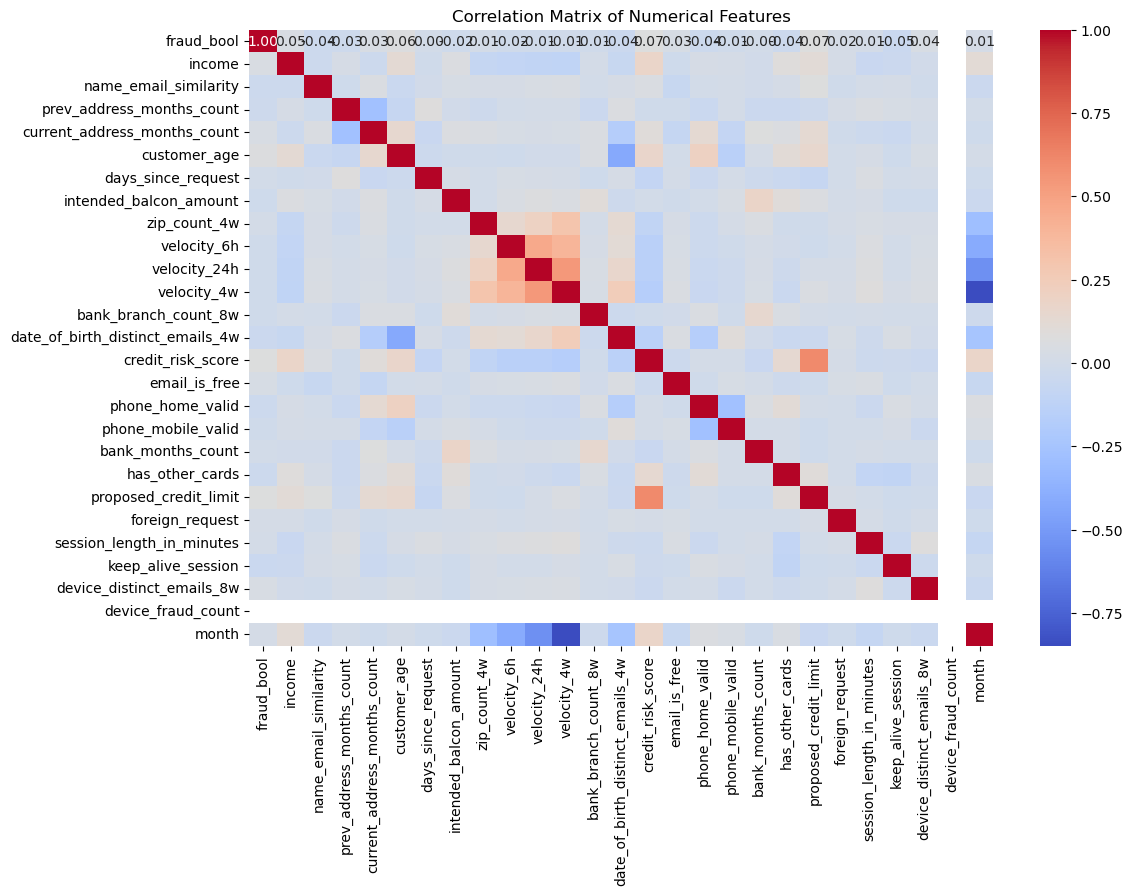

In [ ]:
# under standing the corelation of variables
numerical_features = data.select_dtypes(include=['int64','float64']).columns
X_numerical = data[numerical_features]

# Calculate the correlation matrix for numerical features
corr_matrix = X_numerical.corr()
plt.figure(figsize=(12, 8))
sn.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# get statistical measure of numeric data
data.describe().transpose()

In [4]:
# get statistical measure of non_numeric data
data.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


FEATURE ENGINEERING

In [5]:
# split dataset
x=data.drop('fraud_bool',axis=1)
y=data[['fraud_bool']]

In [6]:
# label enoding for catogorical feature
l1=[]
for i in x.columns:
    if x[i].dtypes=='object':
        le=LabelEncoder()
        x[i]=le.fit_transform(x[i])
        l1.append(le.classes_)

In [7]:
#labeled clases
l1

[array(['AA', 'AB', 'AC', 'AD', 'AE'], dtype=object),
 array(['CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG'], dtype=object),
 array(['BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG'], dtype=object),
 array(['INTERNET', 'TELEAPP'], dtype=object),
 array(['linux', 'macintosh', 'other', 'windows', 'x11'], dtype=object)]

In [8]:
#appaly smote to balance data
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

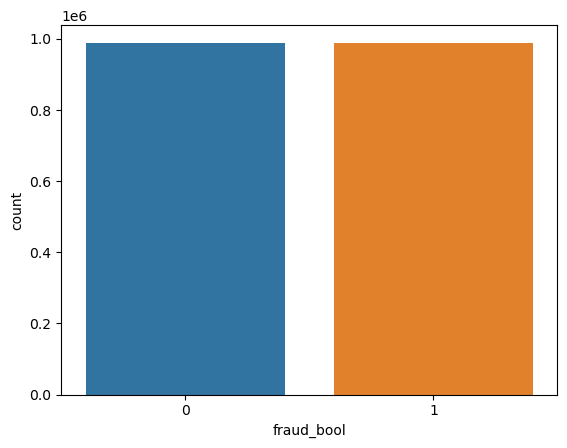

In [9]:
# checl dataset is balanced

sn.countplot(x=y_resampled['fraud_bool'])
plt.show()

In [10]:
# split data into train,test
xtrain,xtest,ytrain,ytest=train_test_split(x_resampled,y_resampled,random_state=32,test_size=0.25)

In [11]:
# applay scaling to data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(xtrain)
x_test_scaled = scaler.transform(xtest)


In [12]:
score=mutual_info_classif(x_train_scaled,ytrain)
pd.Series(score).sort_values(ascending=False)

c:\Users\kommu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0     0.463139
4     0.374500
17    0.198509
27    0.196613
19    0.178938
20    0.177516
28    0.176815
22    0.164816
18    0.133137
16    0.115003
7     0.100828
26    0.094905
3     0.093205
21    0.080801
15    0.051578
13    0.049623
2     0.049559
5     0.047760
6     0.043152
1     0.036413
14    0.029712
12    0.025084
30    0.023123
11    0.019793
25    0.013372
10    0.007869
9     0.006161
23    0.005295
8     0.002991
24    0.002042
29    0.000000
dtype: float64

<Axes: >

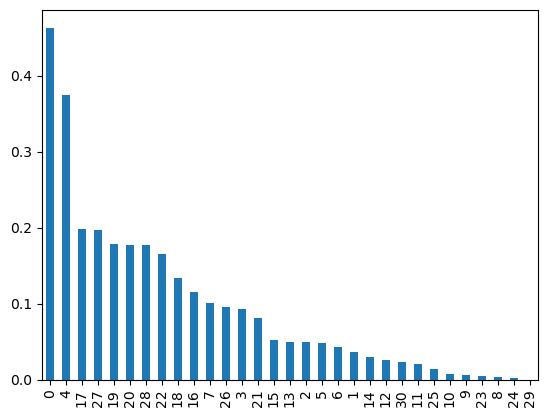

In [13]:
#understand about features
pd.Series(score).sort_values(ascending=False).plot.bar()##

In [32]:
kbest = SelectKBest(score_func=mutual_info_classif, k=6)  
X_train_kbest = kbest.fit_transform(x_train_scaled, ytrain)  
X_test_kbest = kbest.transform(x_test_scaled) 

c:\Users\kommu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
selected_columns = x.columns[kbest.get_support()] 
selected_columns

Index(['income', 'customer_age', 'housing_status', 'phone_mobile_valid',
       'bank_months_count', 'keep_alive_session'],
      dtype='object')

In [35]:
# define new x with new selected features

x_new=x_resampled[['income', 'customer_age', 'housing_status', 'phone_mobile_valid',
       'bank_months_count','keep_alive_session']]

In [36]:
# again split train,test data
new_xtrain,new_xtest,new_ytrain,new_ytest=train_test_split(x_new,y_resampled,random_state=32,test_size=0.25)

In [37]:
scalerr = MinMaxScaler()
x_train_new_scaled = scalerr.fit_transform(new_xtrain)
x_test_new_scaled = scalerr.transform(new_xtest)

In [ ]:
# save
joblib.dump(scalerr,'scaler.joblib')

# modal building

# Random forest

In [20]:
# training the model
r_model=RandomForestClassifier()
r_model.fit(x_train_new_scaled,new_ytrain)

C:\Users\kommu\AppData\Local\Temp\ipykernel_25856\2265740014.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_model.fit(x_train_new_scaled,new_ytrain)


RandomForestClassifier()

In [38]:
# understanding the perfomance of the model
test_p=r_model.predict(x_test_new_scaled)
print('accuracy_score of random forest',accuracy_score(new_ytest,test_p))
print('confusion_matrix \n',confusion_matrix(new_ytest,test_p))
print('classification report \n',classification_report(ytest,test_p))

accuracy_score of random forest 0.9707615584667716
confusion_matrix 
 [[243422   3666]
 [ 10792 236606]]
classification report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    247088
           1       0.98      0.96      0.97    247398

    accuracy                           0.97    494486
   macro avg       0.97      0.97      0.97    494486
weighted avg       0.97      0.97      0.97    494486



In [ ]:
# save model
joblib.dump(r_model,'randomforest.joblib')

EXPLAINABLE AI

In [ ]:

# Explain the model’s predictions without interaction values
explainer = shap.TreeExplainer(r_model)

# Get SHAP values (avoid interaction values)
shap_values = explainer.shap_values(x_test_new_scaled_df, check_additivity=False)

# Convert to NumPy Aarray and check shape
shap_values = np.array(shap_values)
print("SHAP values shape before processing:", shap_values.shape)

# Fix: Ensure correct selection for fraud class (1)
if shap_values.shape[-1] == 2:  # If it has an extra class dimension
    shap_values = shap_values[:, :, 1]  # Select fraud class (1) SHAP values

# Final shape check
print("SHAP values shape after processing:", shap_values.shape)
print("Test dataset shape:", x_test_new_scaled_df.shape)

# Ensure dimensions match before plotting
assert shap_values.shape == x_test_new_scaled_df.shape, "SHAP values and test dataset shapes do not match!"

# Generate SHAP summary plot with all features
shap.summary_plot(shap_values, x_test_new_scaled_df, feature_names=x_test_new_scaled_df.columns)

In [40]:
x_train_new_scaled_df = pd.DataFrame(scalerr.fit_transform(new_xtrain), columns=new_xtrain.columns)
x_test_new_scaled_df = pd.DataFrame(scalerr.transform(new_xtest), columns=new_xtest.columns)

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout
import shap

# Assuming x_train_new_scaled, new_ytrain, x_test_new_scaled, and new_ytest are defined from the previous code

# Reshape input data for LSTM (samples, timesteps, features)
# Assuming timesteps = 1, adjust if needed based on your data.
timesteps = 1
x_train_reshaped = x_train_new_scaled.reshape(x_train_new_scaled.shape[0], timesteps, x_train_new_scaled.shape[1])
x_test_reshaped = x_test_new_scaled.reshape(x_test_new_scaled.shape[0], timesteps, x_test_new_scaled.shape[1])


# Build the LSTM model
model = keras.Sequential([
    LSTM(64, input_shape=(timesteps, x_train_new_scaled.shape[1])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_reshaped, new_ytrain, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch_size as needed


# Evaluate the model
loss, accuracy = model.evaluate(x_test_reshaped, new_ytest)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# XAI with SHAP
# Keras model requires a different explainer from TreeExplainer
explainer = shap.DeepExplainer(model, x_train_reshaped) # Use DeepExplainer for neural networks
shap_values = explainer.shap_values(x_test_reshaped)

# SHAP summary plot
shap.summary_plot(shap_values[0], x_test_new_scaled, feature_names=new_xtest.columns) # Assuming binary classification


In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd

# Create LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_test_new_scaled_df.values,  # Use scaled test data
    feature_names=x_test_new_scaled_df.columns.tolist(),
    class_names=['Not Fraud', 'Fraud'],  # Adjust based on model output
    mode='classification'
)

# Select an instance to explain (example: first row)
i = 0  # Change index for other samples
instance = x_test_new_scaled_df.iloc[i].values.reshape(1, -1)

# Generate LIME explanation
exp = explainer.explain_instance(
    data_row=instance.ravel(),  # Flatten input
    predict_fn=r_model.predict_proba,  # Pass model's probability function
    num_features=10  # Adjust based on importance
)

# Show LIME explanation
exp.show_in_notebook()



In [ ]:
xg_model=XGBClassifier()
xg_model.fit(x_train_new_scaled,new_ytrain)

In [ ]:
kbest = SelectKBest(score_func=mutual_info_classif, k=9)
X_train_kbest = kbest.fit_transform(x_train_scaled, ytrain)
X_test_kbest = kbest.transform(x_test_scaled)

In [ ]:
test_p=xg_model.predict(x_test_new_scaled)
print('accuracy_score of xgboost',accuracy_score(new_ytest,test_p))
print('confusion_matrix \n',confusion_matrix(new_ytest,test_p))
print('classification report \n',classification_report(ytest,test_p))

In [ ]:
import shap
import numpy as np

# Explain the model’s predictions without interaction values
explainer = shap.TreeExplainer(xg_model)git 

# Get SHAP values (avoid interaction values)
shap_values = explainer.shap_values(x_test_new_scaled_df, check_additivity=False)

# Convert to NumPy array and check shape
shap_values = np.array(shap_values)
print("SHAP values shape before processing:", shap_values.shape)

# Fix: Ensure correct selection for fraud class (1)
if shap_values.shape[-1] == 2:  # If it has an extra class dimension
    shap_values = shap_values[:, :, 1]  # Select fraud class (1) SHAP values


# Final shape check
print("SHAP values shape after processing:", shap_values.shape)
print("Test dataset shape:", x_test_new_scaled_df.shape)

# Ensure dimensions match before plotting
assert shap_values.shape == x_test_new_scaled_df.shape, "SHAP values and test dataset shapes do not match!"

# Generate SHAP summary plot with all features
shap.summary_plot(shap_values, x_test_new_scaled_df, feature_names=x_test_new_scaled_df.columns)

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_test_new_scaled_df.values,  # Use scaled test data
    feature_names=x_test_new_scaled_df.columns.tolist(),
    class_names=['Not Fraud', 'Fraud'],  # Adjust based on model output
    mode='classification'
)

# Select an instance to explain (example: first row)
i = 0  # Change index for other samples
instance = x_test_new_scaled_df.iloc[i].values.reshape(1, -1)

# Generate LIME explanation
exp = explainer.explain_instance(
    data_row=instance.ravel(),  # Flatten input
    predict_fn=xg_model.predict_proba,  # Pass model's probability function
    num_features=10  # Adjust based on importance
)

# Show LIME explanation
exp.show_in_notebook()

In [ ]:
# define base models
xgb_model = XGBClassifier(eval_metric='mlogloss')
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# define ensemble models
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model)
    ],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)
stacking_model.fit(x_train_new_scaled, new_ytrain)

In [ ]:
# measure perfomance of model
stacking_model.fit(x_train_new_scaled, new_ytrain)
test_p=stacking_model.predict(x_test_new_scaled)
print('accuracy_score of ensemble model',accuracy_score(new_ytest,test_p))
print('confusion_matrix \n',confusion_matrix(new_ytest,test_p))
print('classification report \n ',classification_report(ytest,test_p))

In [ ]:
xplainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_test_new_scaled_df.values,  # Use scaled test data
    feature_names=x_test_new_scaled_df.columns.tolist(),
    class_names=['Not Fraud', 'Fraud'],  # Adjust based on model output
    mode='classification'
)

# Select an instance to explain (example: first row)
i = 0  # Change index for other samples
instance = x_test_new_scaled_df.iloc[i].values.reshape(1, -1)

# Generate LIME explanation
exp = explainer.explain_instance(
    data_row=instance.ravel(),  # Flatten input
    predict_fn=stacking_model.predict_proba,  # Pass model's probability function
    num_features=10  # Adjust based on importance
)

# Show LIME explanation
exp.show_in_notebook()

In [ ]:
joblib.dump(xg_model,'xgboost.joblib')


In [ ]:
joblib.dump(stacking_model,'ensemble.joblib')

In [ ]:
# model loading and prediction
import joblib
from sklearn.ensemble import RandomForestClassifier
model=joblib.load('randomforest.joblib')
scale=joblib.load('scaler.joblib')
l1=[0.800000,20,2,1,2,1]
input=scale.transform([l1])
pred=model.predict(input)   



In [ ]:
if pred==1:
    print('fraud transaction')
else:
     print('Real transaction')


In [ ]:
# predction -2
l1=[0.9,41,0,0,4,0]
input=scale.transform([l1])
pred=model.predict(input)


In [ ]:
if pred==1:
    print('fraud transaction')
else:
     print('Real transaction')